
<b>Аналитика работы интернет-магазина. Увеличение выручки</b>



Цель работы: увеличить выручку интернет-магазина на основе проведенного анализа данных

План работ:
- Часть 1. Приоритизация гипотез.
- 1.1 Подготовка даннных
- 1.2 Примение фреймворка ICE для приоритизации гипотез
- 1.3 Примение фреймворка RICE для приоритизации гипотез
- 1.4 Выводы по результатам ICE и RICE
- Часть 2. Анализ A/B-теста
- 2.1 Подготовка данных
- 2.2 Построение графика кумулятивной выручки по группам. Формулирование выводов и предположений.
- 2.3 Построение графика кумулятивного среднего чека по группам. Формулирование выводов и предположений.
- 2.4 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Формулирование выводов и предположений
- 2.5 Построение графика кумулятивного среднего количества заказов на посетителя по группам. Формулирование выводов и предположений
- 2.6 Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Формирование выводов и предположений
- 2.7 Построение точечного графика количества заказов по пользователям. Формирование выводов и предположений
- 2.8 Подсчет 95-ого и 99-ого перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей
- 2.9 Построение точечного графика стоимостей заказов. Формирование выводов и предположений
- 2.10 Подсчет 95-ого и 99-ого перцентилей стоимости заказов. Выбор границы для определения аномальных заказов
- 2.11 Посчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Формирование выводов и предположений
- 2.12 Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Формирование выводов и предположений
- 2.13 Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Формирование выводов и предположений
- 2.14 Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Формирование выводов и предположений
- 2.15 Решение по результатам теста


<b>Часть 1. Приоритизация гипотез.</b>

<b>1.1 Подготовка даннных</b>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
register_matplotlib_converters()

In [2]:
pd.options.display.max_colwidth = 1
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<b>1.2 Примение фреймворка ICE для приоритизации гипотез</b>

In [3]:
pd.options.display.max_colwidth = 1
data['ICE'] = data['Impact'] * data['Confidence'] / data['Efforts']
data.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


<b>1.3 Примение фреймворка RICE для приоритизации гипотез</b>

In [4]:
pd.options.display.max_colwidth = 1
data['RICE'] = data['Impact'] * data['Reach'] * data['Confidence'] / data['Efforts']
data.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


<b>1.4 Выводы по результатам ICE и RICE</b>
- При изменени используемого фреймворка с ICE на RICE изменилась приоретизация гипотез. Наиболее приоритетной гипотезой является Добавление формы подписки. Так произошло потому, что RICE учитывает затраты на рекламу и ее эффективность

<b>Часть 2. Анализ A/B-теста</b>

<b>2.1 Подготовка данных</b>

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = pd.to_datetime(orders['date'], format='%Y.%m.%d')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y.%m.%d')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [7]:
orders.duplicated().sum()

0

In [8]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
tmp = orders.groupby('visitorId',as_index = False).agg({'group':'nunique'})
tmp[tmp['group']>1].count()

visitorId    58
group        58
dtype: int64

In [10]:
tmp = tmp[tmp['group']>1]
tmp = tmp['visitorId']
orders = orders.query('visitorId not in @tmp')
#orders = orders.drop_duplicates(subset=['visitorId','group'],keep = False).reset_index(drop=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [11]:
visitors.duplicated().sum()

0

In [12]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

<b>2.2 Построение графика кумулятивной выручки по группам. Формулирование выводов и предположений.</b>

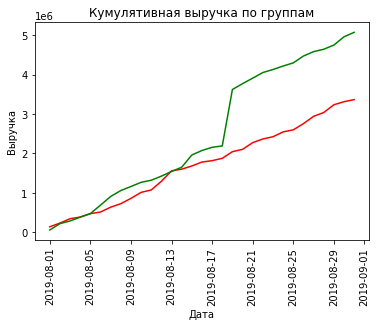

In [13]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
        ].agg({'date': 'max','group': 'max','transactionId': 'nunique','visitorId': 'nunique','revenue': 'sum'}),axis=1,
        ).sort_values(by=['date', 'group'])

ordersAggregatedA = ordersAggregated[ordersAggregated['group'] == 'A']
ordersAggregatedB = ordersAggregated[ordersAggregated['group'] == 'B']

plt.plot(ordersAggregatedA['date'],ordersAggregatedA['revenue'],color = 'r',label = 'Группа А')
plt.plot(ordersAggregatedB['date'],ordersAggregatedB['revenue'],color = 'g',label = 'Группа Б')
plt.rcParams["figure.figsize"] = [13, 13]
plt.xticks(rotation = 90)
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.title("Кумулятивная выручка по группам")
plt.show()

<b>Исходя из графика можно сделать выводы:</b>
- До серидины августа динамика роста прибыли различалась слабо, но в середине месяца прибыль от Группы Б сильно возросла


<b>2.3 Построение графика кумулятивного среднего чека по группам. Формулирование выводов и предположений.</b>

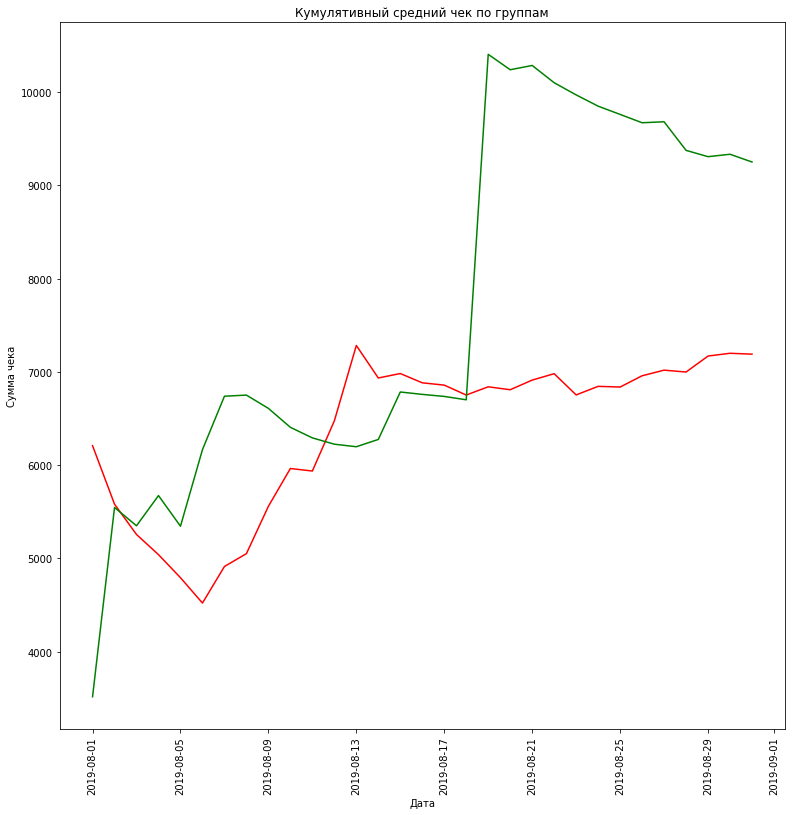

In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
        ].agg({'date': 'max','group': 'max','transactionId': 'nunique','visitorId': 'nunique','revenue': 'mean'}),axis=1,
        ).sort_values(by=['date', 'group'])

ordersAggregatedA = ordersAggregated[ordersAggregated['group'] == 'A']
ordersAggregatedB = ordersAggregated[ordersAggregated['group'] == 'B']

plt.plot(ordersAggregatedA['date'],ordersAggregatedA['revenue'],color = 'r',label = 'Группа А')
plt.plot(ordersAggregatedB['date'],ordersAggregatedB['revenue'],color = 'g',label = 'Группа Б')
plt.rcParams["figure.figsize"] = [13, 13]
plt.xticks(rotation = 90)
plt.xlabel("Дата")
plt.ylabel("Сумма чека")
plt.title("Кумулятивный средний чек по группам")
plt.show()

<b>Исходя из графика можно сделать выводы:</b>
- До серидины августа динамика роста среднего чека в Группе Б была лучше, чем в Группе А.
- На этом графике так же можно увидеть резкий значительный рост среднего чека Группы Б в середине месяца
- Резкий рост показателя в Группе Б может быть связан с увеличением рекламного бюджета

<b>2.4 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Формулирование выводов и предположений</b>

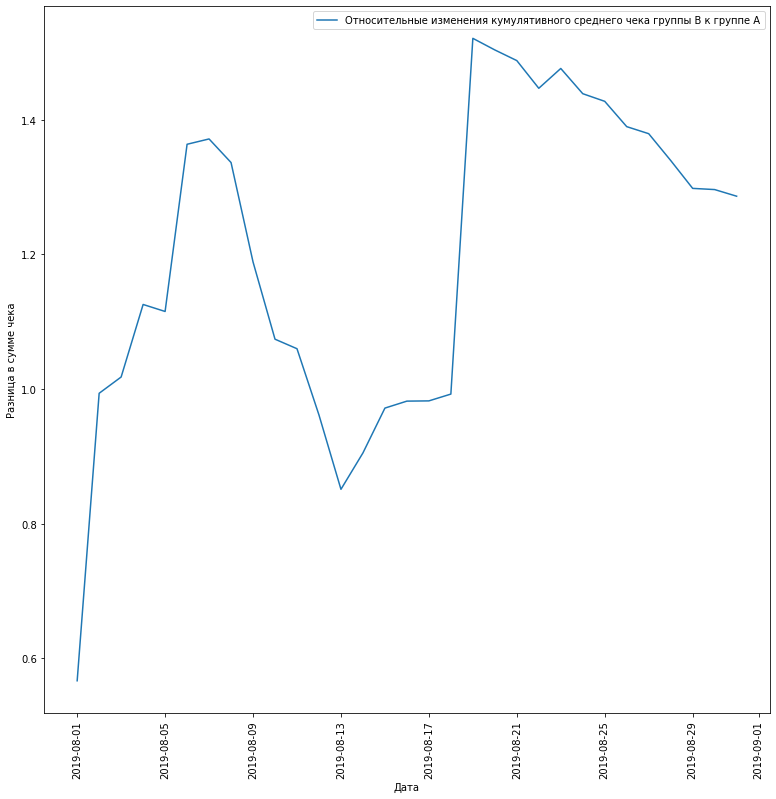

In [15]:
mergedCumulativeCheck = ordersAggregatedA[['date','revenue']].merge(ordersAggregatedB[['date','revenue']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeCheck['date'], mergedCumulativeCheck['revenueB']/mergedCumulativeCheck['revenueA'], label="Относительные изменения кумулятивного среднего чека группы B к группе A")
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel("Дата")
plt.ylabel("Разница в сумме чека")
plt.show()

<b>Исходя из графика можно сделать выводы:</b>
- 13.08 различия были минимальны, в остальное время средние чеки сильно различались

<b>2.5 Построение графика кумулятивного среднего количества заказов на посетителя по группам. Формулирование выводов и предположений.</b>

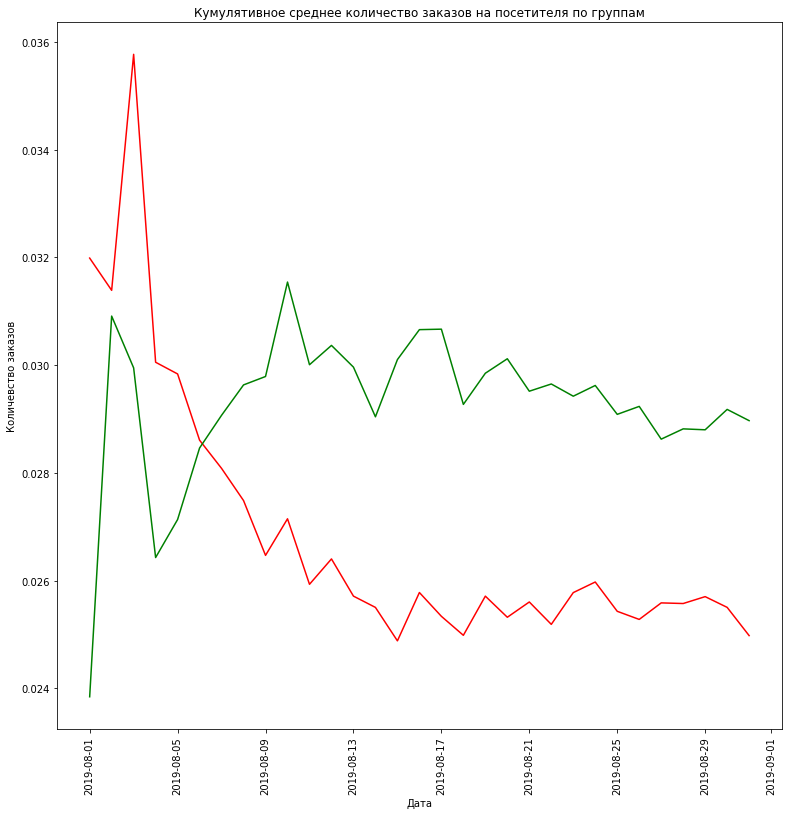

In [16]:
ordersAggregated = datesGroups.apply(lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
        ].agg({'date': 'max','group': 'max','transactionId': 'nunique','visitorId': 'nunique','revenue': 'count'}),axis=1,
        ).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
visitors['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData['commulative'] = cumulativeData['revenue']/cumulativeData['visitors']

ordersAggregatedA = cumulativeData[cumulativeData['group'] == 'A']
ordersAggregatedB = cumulativeData[cumulativeData['group'] == 'B']

plt.plot(ordersAggregatedA['date'],ordersAggregatedA['commulative'],color = 'r',label = 'Группа А')
plt.plot(ordersAggregatedB['date'],ordersAggregatedB['commulative'],color = 'g',label = 'Группа Б')
plt.rcParams["figure.figsize"] = [13, 13]
plt.xlabel("Дата")
plt.ylabel("Количевство заказов")
plt.title("Кумулятивное среднее количество заказов на посетителя по группам")
plt.xticks(rotation = 90)
plt.show()

<b>Исходя из графика можно сделать выводы:</b>
- На графике видно, что среднее количество заказов на посетителя изначально было выше в группе А, но затем упало, а в группе Б возрасло
- В обеих группах среднее постепенно снижается, но в Группе Б оно значительно больше

<b>2.6 Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Формирование выводов и предположений.</b>

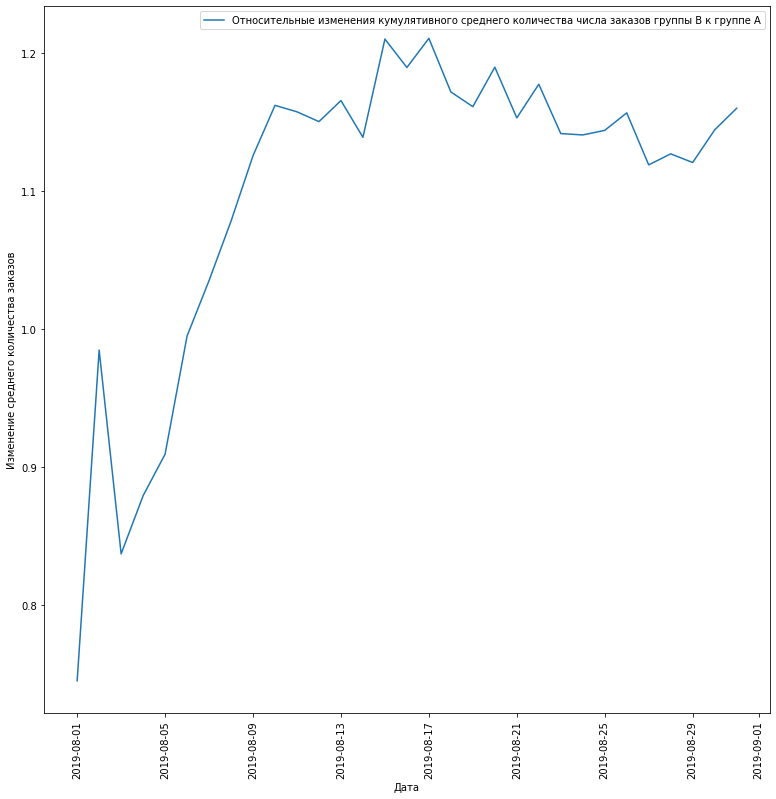

In [17]:
mergedCumulativeСount = ordersAggregatedA[['date','commulative']].merge(ordersAggregatedB[['date','commulative']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeСount['date'], mergedCumulativeСount['commulativeB']/mergedCumulativeСount['commulativeA'], label="Относительные изменения кумулятивного среднего количества числа заказов группы B к группе A")
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Изменение среднего количества заказов")
plt.xticks(rotation = 90)
plt.show()

<b>Исходя из графика можно сделать выводы:</b>
- На графике не видно, что разница в числе заказов между группами сильно возростала 5 августа и была очень высокой на протяжении всего исследования

<b>2.7 Построение точечного графика количества заказов по пользователям. Формирование выводов и предположений.</b>

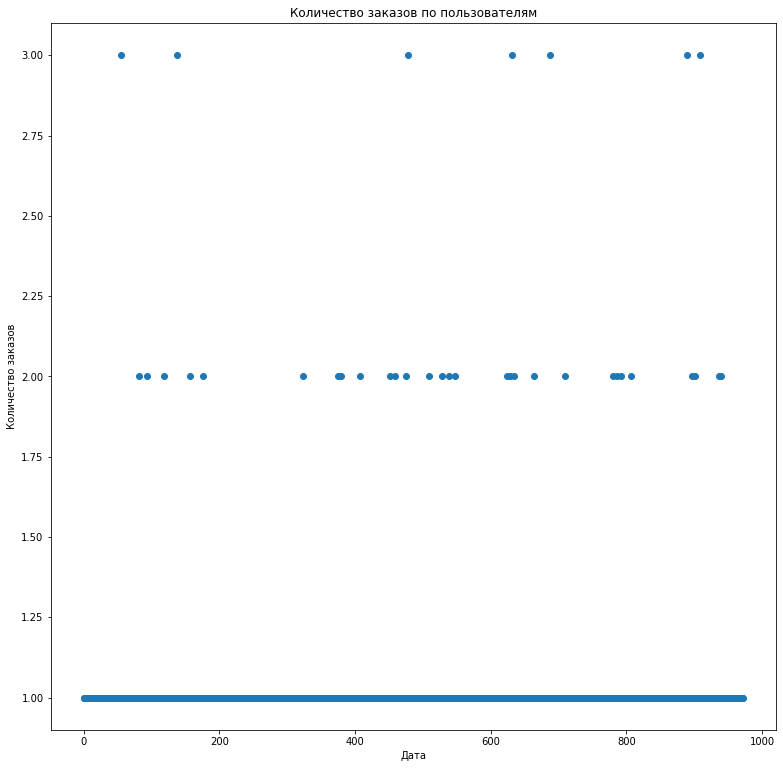

In [18]:
ordersByUsers = orders.groupby('visitorId',as_index = False).agg({'transactionId':'nunique'})
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x=x_values,y=ordersByUsers['transactionId'])
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.title("Количество заказов по пользователям")
plt.show()

<b>Исходя из графика можно сделать выводы:</b>
- Подавляющее число пользователей сделали всего 1 заказ
- Больше 2 заказов делали очень мало пользователей

<b>2.8 Подсчет 95-ого и 99-ого перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей.</b>

In [19]:
perc = np.percentile(ordersByUsers['transactionId'],[95, 99])
print(perc.astype('int'))

[1 2]


<b>2.9 Построение точечного графика стоимостей заказов. Формирование выводов и предположений.</b>

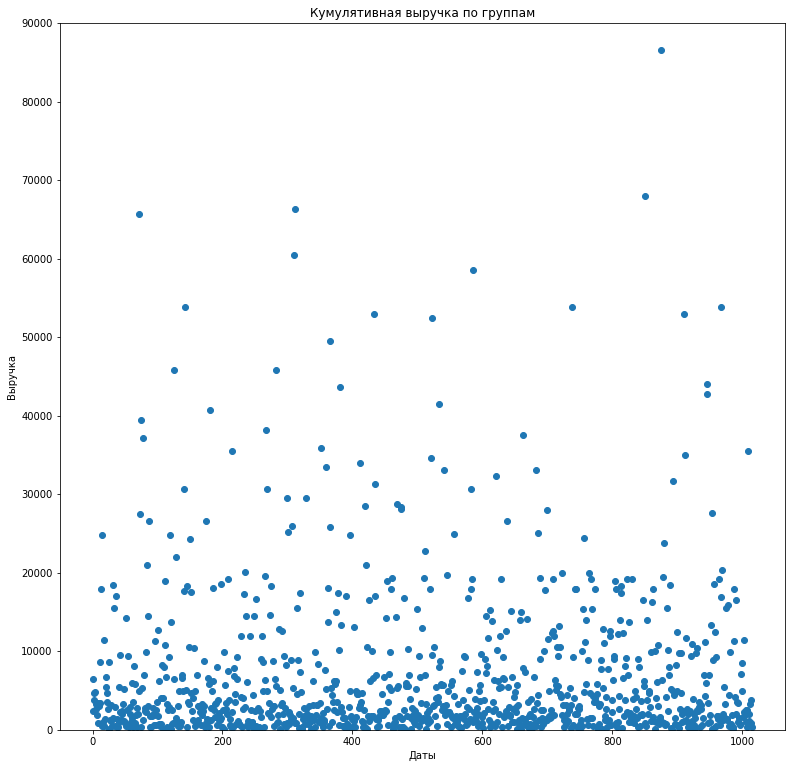

In [20]:
ordersByCost = orders.groupby('transactionId',as_index = False).agg({'revenue':'sum'})
x_values = pd.Series(range(0, len(ordersByCost)))
plt.ylim([0, 90000])
plt.scatter(x=x_values,y=ordersByCost['revenue'])
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.title("Кумулятивная выручка по группам")
plt.show()

<b>Исходя из графика можно сделать выводы:</b>
- Подавляющее число заказов менее 10000

<b>2.10 Подсчет 95-ого и 99-ого перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.</b>

In [21]:
perc2 = np.percentile(ordersByCost['revenue'],[95, 99])
print(perc2.astype('int'))

[26785 53904]


<b>2.11 Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Формирование выводов и предположений.</b>

<b>Гипотезы </b>
- H0: Разницы между группами нет
- H1: Разница между группами есть
- Гипотеза будет проверяться тестом Манна-Уитни со статистической значимостью - 5%

In [22]:
vpdA = visitors[visitors['group']=='A']#.groupby('date').agg({'visitorId':'nunique'})
vpdB = visitors[visitors['group']=='B']#.groupby('date').agg({'visitorId':'nunique'})
#vpdB

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                vpdA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                vpdB['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01102
0.160


<b>Вывод: </b>Исходя из анализа сырых даных можно сделать вывод о том, что P-value ниже 0.5, значит что статистичесская значимость разницы между группами существенная

<b>2.12 Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Формирование выводов и предположений</b>

In [25]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


<b>Вывод: </b> Исходя из анализа сырых даных можно сделать вывод о том, что P-value ,меньше 0.5, значит что статистичесская значимость разницы между группами есть

<b>2.13 Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Формирование выводов и предположений</b>

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > perc[0]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > perc[0]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > perc2[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                vpdA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                vpdB['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.016
0.174


<b>Вывод: </b> Исходя из анализа очищенных даных можно сделать вывод о том, что P-value ниже 0.5, значит что статистической значимость между группами есть

<b>2.14 Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Формирование выводов и предположений</b>

In [29]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.727
-0.034


<b>Вывод: </b> Исходя из анализа очищенных даных можно сделать вывод о том, что P-value больше 0.5, значит что статистической значимости между группами нет. Так же можно сделать вывод, что "очистка" данных значительно повлияла на вывод

<b>2.15 Решение по результатам теста:</b> Остановить тест, зафиксировать различие между группами. Группа Б показывает значительно лучшие результаты по сравнению с Группой А. Очистка данных повлияла на результат. Продолжать тест не имеет смысла.

<b>Приоретизация гипотез:</b>  В первую очередь нужно запустить акцию, дающую скидку на товар в день рождения, т.к. RICE более актуальная
для маркетинга, а так же Запустить акцию, дающую скидку на товар в день рождения
